다차원 시계열 데이터에 대한 plot과 miniROCKET

In [22]:
import numpy as np
from sklearn.linear_model import RidgeClassifierCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sktime.datasets import (
    load_arrow_head,        # univariate dataset
    load_basic_motions,     # multivariate dataset
    load_japanese_vowels,   # multivariate dataset with unequal length
)
from sktime.transformations.panel.rocket import (
    MiniRocket,
    MiniRocketMultivariate,
    MiniRocketMultivariateVariable,
)

In [23]:
X_train, y_train = load_basic_motions(split="train", return_X_y=True)

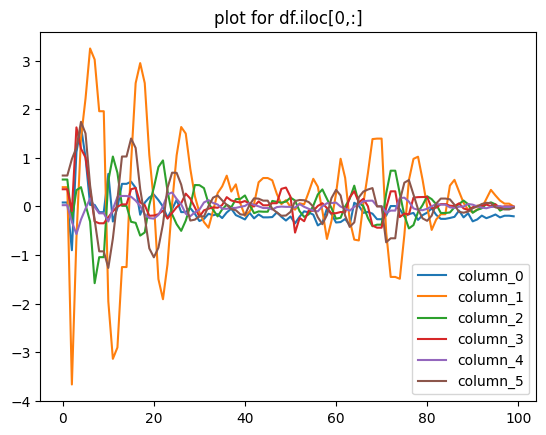

In [24]:
X_train.shape

for i in range(X_train.shape[1]):
    plt.plot(X_train.iloc[0,i], label=f"column_{i}")
plt.title("plot for df.iloc[0,:]")
plt.legend()
plt.show()

In [25]:
minirocket_multi = MiniRocketMultivariate()
minirocket_multi.fit(X_train)
X_train_transform = minirocket_multi.transform(X_train)

In [26]:
scaler = StandardScaler(with_mean=False)
X_train_scaled_transform = scaler.fit_transform(X_train_transform)

classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
classifier.fit(X_train_scaled_transform, y_train)

,alphas,array([1.0000...00000000e+03])
,fit_intercept,True
,scoring,None
,cv,None
,class_weight,None
,store_cv_results,False


In [27]:
X_test, y_test = load_basic_motions(split="test", return_X_y=True)
X_test_transform = minirocket_multi.transform(X_test)

In [28]:
X_test_scaled_transform = scaler.transform(X_test_transform)
classifier.score(X_test_scaled_transform, y_test)

1.0

In [29]:
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test_scaled_transform)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

   badminton       1.00      1.00      1.00        10
     running       1.00      1.00      1.00        10
    standing       1.00      1.00      1.00        10
     walking       1.00      1.00      1.00        10

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

